<a href="https://colab.research.google.com/github/Delonix7/IBM_Data_Science_Capstone/blob/main/PhD_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A1/A2 Contribution to Dilutional Hyponatremia in Liver Cirrhosis

##Importing data

In [ ]:
import pandas as pd
import matplotlib.pyplot  as plt
%matplotlib inline
import numpy as  np
import seaborn as sns
from scipy.stats import sem
#authenticate colabs to allow access to Google Drive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
def get_data(url, file_name):
  dataframe_name = pd.DataFrame()
  data_url_list = url.split('/')
  downloaded = drive.CreateFile({'id':data_url_list[5]})
  downloaded.GetContentFile(file_name)
  dataframe_name = pd.read_csv(file_name)
  return dataframe_name

In [ ]:
url = 'https://drive.google.com/file/d/1kj6cs2u_ZJR6U0cvCpdwKqOVkhgUhBId/view?usp=sharing'
file_name = 'Sap_project_data.csv'

In [ ]:
sap_project_data = get_data(url, file_name)

In [ ]:
sap_project_data.head()

,Rat ID,Injection,Surgery,L:B ratio,CPP conc,CPP as ratios,Osmolality,Crit,A1 DBH,A1 dFosB,A1 DL,A2 DBH,A2 dFosB,A2 DL,SON_dFosB,SON_DL
0,R19-134,DSAP,BDL,0.056566,111.4885,1.561760,304.0,42.5,43,19,3,24,48,1,46.0,19.0
1,R19-135,DSAP,BDL,0.041700,81.4151,1.342934,298.0,46.5,36,25,0,28,65,2,51.0,29.0
2,R19-270,DSAP,BDL,0.078125,227.1039,1.094452,302.5,47.0,46,25,1,29,56,2,21.0,8.0
3,R19-271,DSAP,BDL,0.041000,307.5000,1.096000,301.0,48.0,34,18,0,28,36,0,22.0,15.0
4,R19-272,DSAP,BDL,0.066946,151.4877,1.481950,297.5,42.0,53,30,0,44,55,0,51.0,15.0


In [ ]:
#Replacing spaces in column names with hyphens
sap_project_data.columns = sap_project_data.columns.str.lower()
sap_project_data.columns = sap_project_data.columns.str.replace(' ', '_')

In [ ]:
sap_project_data.head()

,rat_id,injection,surgery,l:b_ratio,cpp_conc,cpp_as_ratios,osmolality,crit,a1_dbh,a1_dfosb,a1_dl,a2_dbh,a2_dfosb,a2_dl,son_dfosb,son_dl
0,R19-134,DSAP,BDL,0.056566,111.4885,1.561760,304.0,42.5,43,19,3,24,48,1,46.0,19.0
1,R19-135,DSAP,BDL,0.041700,81.4151,1.342934,298.0,46.5,36,25,0,28,65,2,51.0,29.0
2,R19-270,DSAP,BDL,0.078125,227.1039,1.094452,302.5,47.0,46,25,1,29,56,2,21.0,8.0
3,R19-271,DSAP,BDL,0.041000,307.5000,1.096000,301.0,48.0,34,18,0,28,36,0,22.0,15.0
4,R19-272,DSAP,BDL,0.066946,151.4877,1.481950,297.5,42.0,53,30,0,44,55,0,51.0,15.0


In [ ]:
sap_project_data.replace('-', np.NaN, inplace = True)

In [ ]:
sap_project_data.head()

,rat_id,injection,surgery,l:b_ratio,cpp_conc,cpp_as_ratios,osmolality,crit,a1_dbh,a1_dfosb,a1_dl,a2_dbh,a2_dfosb,a2_dl,son_dfosb,son_dl
0,R19-134,DSAP,BDL,0.056566,111.4885,1.561760,304.0,42.5,43,19,3,24,48,1,46.0,19.0
1,R19-135,DSAP,BDL,0.041700,81.4151,1.342934,298.0,46.5,36,25,0,28,65,2,51.0,29.0
2,R19-270,DSAP,BDL,0.078125,227.1039,1.094452,302.5,47.0,46,25,1,29,56,2,21.0,8.0
3,R19-271,DSAP,BDL,0.041000,307.5000,1.096000,301.0,48.0,34,18,0,28,36,0,22.0,15.0
4,R19-272,DSAP,BDL,0.066946,151.4877,1.481950,297.5,42.0,53,30,0,44,55,0,51.0,15.0


In [ ]:
DSAP_BDL = sap_project_data.loc[sap_project_data['injection'].str.contains('DSAP') & sap_project_data['surgery'].str.contains('BDL')]
DSAP_Sham = sap_project_data.loc[sap_project_data['injection'].str.contains('DSAP') & sap_project_data['surgery'].str.contains('Sham')]
Veh_BDL = sap_project_data.loc[sap_project_data['injection'].str.contains('Vehicle') & sap_project_data['surgery'].str.contains('BDL')]
Veh_Sham = sap_project_data.loc[sap_project_data['injection'].str.contains('Vehicle') & sap_project_data['surgery'].str.contains('Sham')]

In [ ]:
column_names = list(sap_project_data.columns)

In [ ]:
column_names.remove('rat_id')
column_names.remove('injection')
column_names.remove('surgery')

In [ ]:
groups = [DSAP_Sham, DSAP_BDL, Veh_BDL, Veh_Sham]
for group in groups:
  group.reset_index(inplace = True)

In [ ]:
sap_project_data.set_index('rat_id', inplace = True)

In [ ]:
class Variables:
  def __init__ (self, df1, df2, df3, df4, var):
    self.df1 = df1
    self.df2 = df2
    self.df3 = df3
    self.df4 = df4
    self.dataframes = [self.df1, self.df2, self.df3, self.df4]
    self.var = var
    self.series = []
    self.new_dataframe = pd.DataFrame(index = range(0, 8))

  @property
  def create_dataframe(self):
    self.new_dataframe = self.new_dataframe.assign(Veh_Sham = Veh_Sham[self.var])
    self.new_dataframe = self.new_dataframe.assign(Veh_BDL = Veh_BDL[self.var])
    self.new_dataframe = self.new_dataframe.assign(DSAP_Sham = DSAP_Sham[self.var])
    self.new_dataframe = self.new_dataframe.assign(DSAP_BDL = DSAP_BDL[self.var])
    return self.new_dataframe

In [ ]:
import time

In [ ]:
start = time.time()
data = {}
for column in column_names:
  new_object = Variables(DSAP_Sham, DSAP_BDL, Veh_BDL,  Veh_Sham, column)
  data[column] = new_object.create_dataframe
end = time.time()
execution_time = end - start
print(f'The function took {execution_time} to run')

The function took 0.15118956565856934 to run


In [ ]:
data.keys()

dict_keys(['l:b_ratio', 'cpp_conc', 'cpp_as_ratios', 'osmolality', 'crit', 'a1_dbh', 'a1_dfosb', 'a1_dl', 'a2_dbh', 'a2_dfosb', 'a2_dl', 'son_dfosb', 'son_dl'])

In [ ]:
data['osmolality'].corr()

,Veh_Sham,Veh_BDL,DSAP_Sham,DSAP_BDL
Veh_Sham,1.000000,0.535486,0.597586,0.449877
Veh_BDL,0.535486,1.000000,0.258262,-0.088683
DSAP_Sham,0.597586,0.258262,1.000000,0.354169
DSAP_BDL,0.449877,-0.088683,0.354169,1.000000


In [ ]:
sap_project_data['cpp_as_ratios'].corr(sap_project_data['osmolality'])

-0.51883244841534

In [ ]:
def draw_scatter(x, y, data):
  plt.scatter(x = data[x], y = data[y])
  plt.xlabel(f'{x}')
  plt.ylabel(f'{y}')
  plt.title(f'{x} vs {y}')
  plt.show()

In [ ]:
sap_project_data['surgery'].value_counts()

BDL     14
Sham    14
Name: surgery, dtype: int64

In [ ]:
# sap_project_data['surgery'].replace({'BDL': 1, 'Sham': 0}, inplace = True)

In [ ]:
# sap_project_data['sham'] = sap_project_data['surgery'] == 'Sham'

In [ ]:
# sap_project_data['injection'].value_counts()

In [ ]:
# for column_x in column_names[0:7]:
#   for column_y in column_names[7:]:
#     if column_x != column_y:
#       draw_scatter(column_x, column_y, sap_project_data)


In [ ]:
sap_project_data_scatter = pd.DataFrame()
sap_project_data_scatter['Treatment'] = sap_project_data['injection'] +'_'+ sap_project_data['surgery']
for column in column_names:
  sap_project_data_scatter[column] = sap_project_data[column]

sap_project_data_scatter['Treatment'].replace({'Vehicle_BDL': 'Veh_BDL'}, inplace =True)
sap_project_data_scatter['Treatment'].replace({'Vehicle_Sham': 'Veh_Sham'}, inplace =True)

In [ ]:
def draw_graphs(data, variable):
  data_y = []
  data_y_error = []
  data_x = list(sap_project_data_scatter['Treatment'].unique())
  for data1 in data_x:
    data_y.append(data[variable][data1].dropna().mean())
    data_y_error.append(sem(data[variable][data1].dropna()))

  plt.bar(data_x,  data_y,  color = ['gray', 'burlywood', 'brown', 'green'])
  sns.swarmplot(x = 'Treatment',y = variable, data = sap_project_data_scatter, zorder = 2, color = 'black', size = 7)
  plt.errorbar(x =data_x, y=data_y, yerr =data_y_error, fmt = 'o' , color = 'black', capsize = 10)
  plt.ylabel(f'{variable}', size =7)
  plt.title(f'Graph for {variable}')
  plt.show()

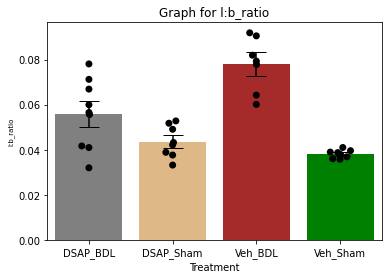

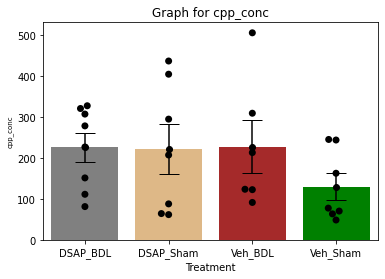

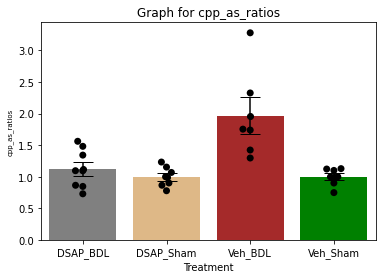

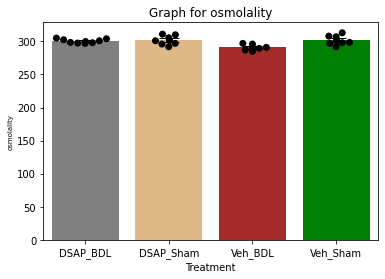

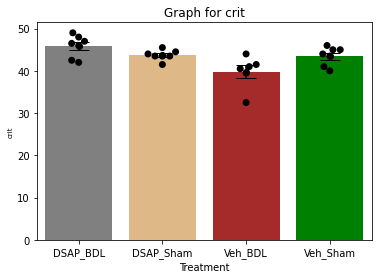

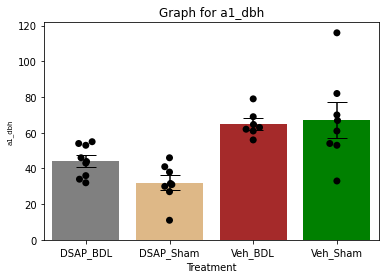

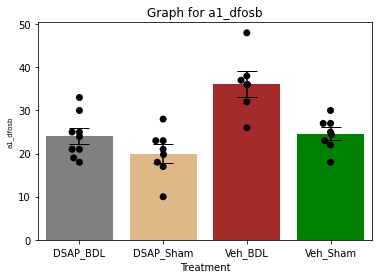

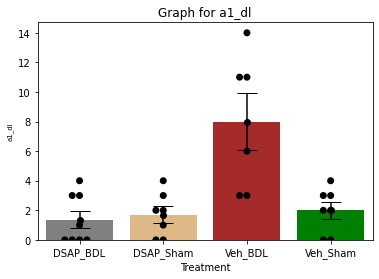

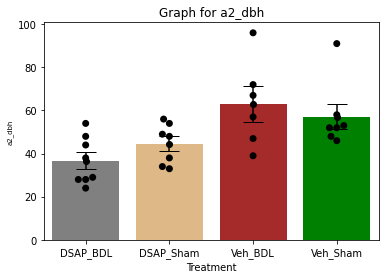

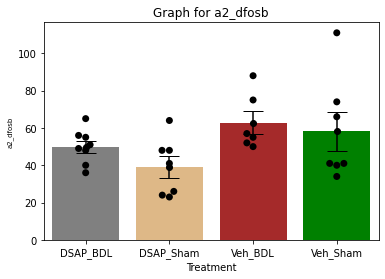

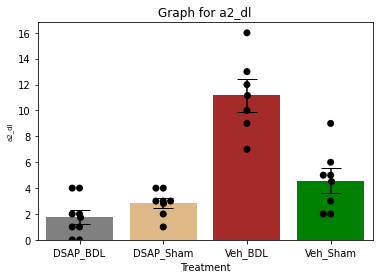

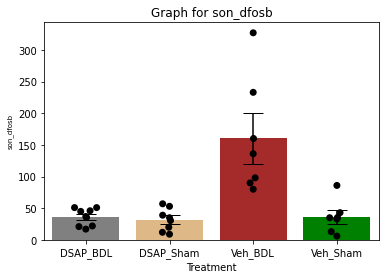

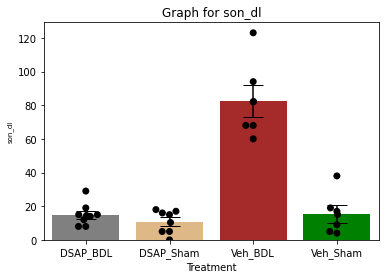

In [ ]:
for column in column_names:
  draw_graphs(data, column)

In [ ]:
# data_y = [data['a2_dl']['DSAP_BDL'].mean(), data['a2_dl']['DSAP_Sham'].mean(), data['a2_dl']['Veh_BDL'].mean(),data['a2_dl']['Veh_Sham'].mean()  ]
# data_y_error =[sem(data['a2_dl']['DSAP_BDL'].dropna()),sem(data['a2_dl']['DSAP_Sham'].dropna()), sem(data['a2_dl']['Veh_BDL'].dropna()), 
#                sem(data['a2_dl']['Veh_Sham'].dropna())]
# sap_project_data_scatter['Treatment'].replace({'Vehicle_BDL': 'Veh_BDL'}, inplace =True)
# sap_project_data_scatter['Treatment'].replace({'Vehicle_Sham': 'Veh_Sham'}, inplace =True)
# data_x = list(sap_project_data_scatter['Treatment'].unique())
# plt.bar(data_x,  data_y,  zorder = 1, color = ['gray', 'burlywood', 'brown', 'green'])
# sns.swarmplot(x = 'Treatment',y = 'a2_dl', data = sap_project_data_scatter, zorder = 2, color = 'black')
# plt.errorbar(x =data_x, y=data_y, yerr =data_y_error, fmt = 'o' , color = 'black', capsize = 10)
# plt.ylabel('Total number of A2 cells Immunoreactive to DBH and Delta FosB', size =7)
# plt.title('A2 Double Labeled Cells')
# plt.show()